In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Unsupervised learning method for dimensionality reduction

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

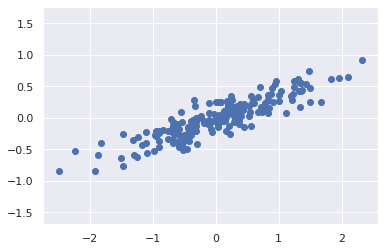

In [24]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# most important data: components & explained variance
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [27]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


what do they mean? Visualize them as vectors over input data, using the "components" to define the direction of the vector, "explained variance" as squared length of vector

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

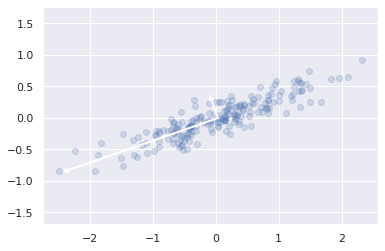

In [28]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0,
                   shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

The vectors represent the principal axes of the data, length indicates how "important" that axis is in describing the distribution of the data: measure of variance of the data when projected onto that axis.  
The projection of each data point onto the principal axes are the **principal components** of the data.  
This transformation is an **affine transformation**, which besically means it is composed of a translation, rotation and uniform scaling

# PCA as dimensionality reduction
You have to zero out one or more of the smallest principal components.

In [29]:
pca = PCA(n_components=1) # notice we changed the component from 2 to 1
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:    ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:     (200, 2)
transformed shape:  (200, 1)


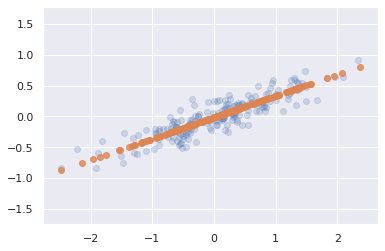

In [33]:
X_new = pca.inverse_transform(X_pca) # add minor principal axis, but set to 0
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

despite reducing the dimension of the data, relationship is preserved

# handwritten digits

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [35]:
pca = PCA(2) # project from 64 to 2 dimesions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


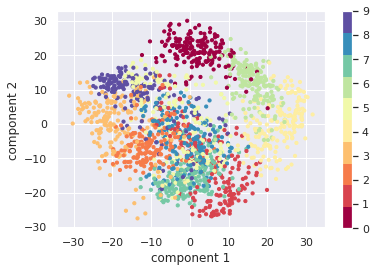

In [41]:
# plot
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Spectral', 10)
                           , s=10)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## choosing the number of components
We determine this by looking at the cumulative **explained variance ratio** as a function of then number of components, it measures how well PCA preserves content of data

Text(0, 0.5, 'cumulative explained variance')

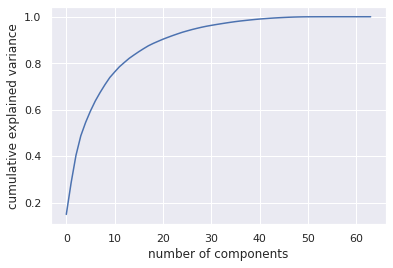

In [45]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## PCA as Noise filtering

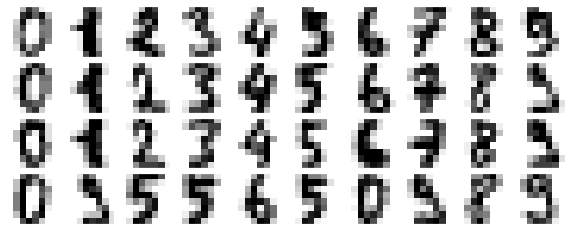

In [57]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
plot_digits(digits.data)

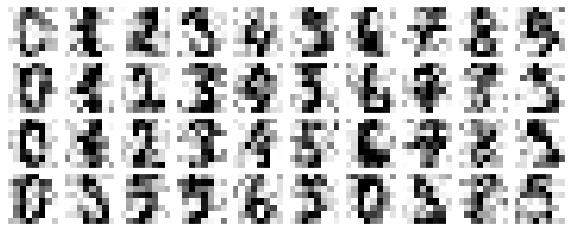

In [60]:
# add noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [62]:
pca = PCA(0.5).fit(noisy) # preserve 50% of variance
pca.n_components_

12

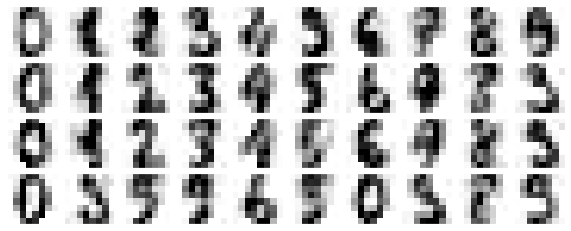

In [63]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Summary
pro: effective for high dimension data, to visualize relationship between points  
con: affected by outliers in data, doesn't perform well if there is non-linear relationships within the data